# Практична робота №5
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

##### 1st - 2nd task

In [140]:
import tensorflow as tf
import numpy as np

tf_scalar = tf.constant(13)
print("Scalar - ", tf_scalar)

tf_vector_a = tf.Variable([3, 13, 33.0])
print("Vector - ", tf_vector)

tf_matrix_a = tf.constant([[13, 17],
                        [17, 13]])
print("Matrix a - ", tf_matrix_a)

ar_matrix_b = np.arange(20, 24, dtype=np.int32)
tf_matrix_b = tf.constant(ar_matrix_b, shape=(2, 2))
print("Matrix b - ", tf_matrix_b)

tf_tensor = tf.constant([[[3, 13, 33],
                       [7, 17, 77]],
                      [[9, 19, 99],
                       [4, 14, 44]],
                      [[2, 12, 22],
                       [8, 18, 88]]])
print("Tensor - ", tf_tensor)


print("\nMathematical operations on tensors:")
sum_tensors = tf.add(tf_matrix_a, tf_matrix_b)
print("* Sum - ", sum_tensors)
dif_tensors = tf.subtract(tf_matrix_a, tf_matrix_b)
print("* Difference - ", dif_tensors)
mul_tensors = tf.multiply(tf_matrix_a, tf_matrix_b)
print("* Multiplication - ", mul_tensors)
div_tensors = tf.divide(tf_matrix_a, tf_matrix_b)
print("* Division - ", div_tensors)

print("\nMatrix Multiplication operations:")
matrix_product = tf.matmul(tf_matrix_a, tf_matrix_b)
print("* Matrix Multiplication - ", matrix_product)

print("\nReduction operations:")
sum_all_elements = tf.reduce_sum(tf_tensor)
print("* Sum of all elements - ", sum_all_elements)
max_value = tf.reduce_max(tf_tensor)
print("* Maximum - ", max_value)
mean_value = tf.reduce_mean(tf_tensor)
print("* Mean - ", mean_value)
min_value = tf.reduce_min(tf_tensor)
print("* Minimum - ", min_value)

print("\nSlice operations:")
element = tf_tensor[2, 0]
print("* Element from the 3rd raw and 1st column - ", element)
sliced_tensor = tf_tensor[:, 1]
print("* Get all elements from the 2nd column", sliced_tensor)


Scalar -  tf.Tensor(13, shape=(), dtype=int32)
Vector -  <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([ 3., 13., 33.], dtype=float32)>
Matrix a -  tf.Tensor(
[[13 17]
 [17 13]], shape=(2, 2), dtype=int32)
Matrix b -  tf.Tensor(
[[20 21]
 [22 23]], shape=(2, 2), dtype=int32)
Tensor -  tf.Tensor(
[[[ 3 13 33]
  [ 7 17 77]]

 [[ 9 19 99]
  [ 4 14 44]]

 [[ 2 12 22]
  [ 8 18 88]]], shape=(3, 2, 3), dtype=int32)

Mathematical operations on tensors:
* Sum -  tf.Tensor(
[[33 38]
 [39 36]], shape=(2, 2), dtype=int32)
* Difference -  tf.Tensor(
[[ -7  -4]
 [ -5 -10]], shape=(2, 2), dtype=int32)
* Multiplication -  tf.Tensor(
[[260 357]
 [374 299]], shape=(2, 2), dtype=int32)
* Division -  tf.Tensor(
[[0.65       0.80952381]
 [0.77272727 0.56521739]], shape=(2, 2), dtype=float64)

Matrix Multiplication operations:
* Matrix Multiplication -  tf.Tensor(
[[634 664]
 [626 656]], shape=(2, 2), dtype=int32)

Reduction operations:
* Sum of all elements -  tf.Tensor(489, shape=(), dty

##### 3rd task

Training Loss (MSE) on Training Data: [157.73504638671875, 157.73504638671875]
Test Loss (MSE) on Test Data: [178.6994171142578, 178.6994171142578]


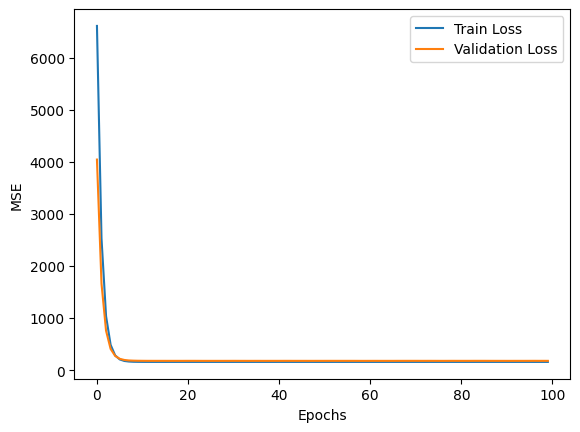

In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
data = pd.read_csv('data_make_regression.csv')
X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#Neural network model
model = Sequential([
    Dense(1, input_shape=(X.shape[1],))
])

#Compile and train the model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

#Evaluate the model on the train data and test data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Training Loss (MSE) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MSE) on Test Data:", test_loss)

#Visualization of learning results
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

У 2-ій лабораторній роботі маємо значення MSE = 192.02, у цій практичній маємо значення MSE = 178.6994171142578. Порівнюючи ці значення, можемо дійти висновку, що вони близькі за значенням, ба більше результат з роботою нейронної мережі має кращий результат

##### 3rd task

Training Loss (Accuracy) on Training Data: [0.2799089848995209, 0.9325000047683716]
Test Loss (Accuracy) on Test Data: [0.2792139947414398, 0.9449999928474426]


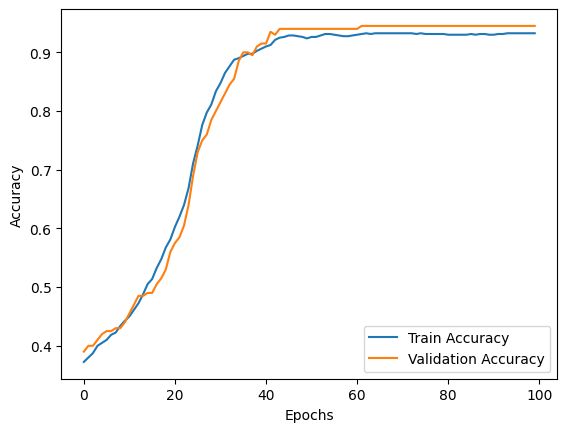

In [152]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import pandas as pd
data = pd.read_csv('binary_classification.csv')
X = data.drop('Target', axis=1)
y = data['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#Neural network model
model = Sequential([
    Dense(1, input_shape=(X.shape[1],), activation='sigmoid')
])
#Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

#Evaluate the model on the train data and test data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Training Loss (Accuracy) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (Accuracy) on Test Data:", test_loss)


#Visualization of learning results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

У 3-ій лабораторній роботі маємо значення accuracy = 0.94, у цій практичній маємо таке ж значення accuracy = 0.94. Можемо дійти висновку, що вони однакові